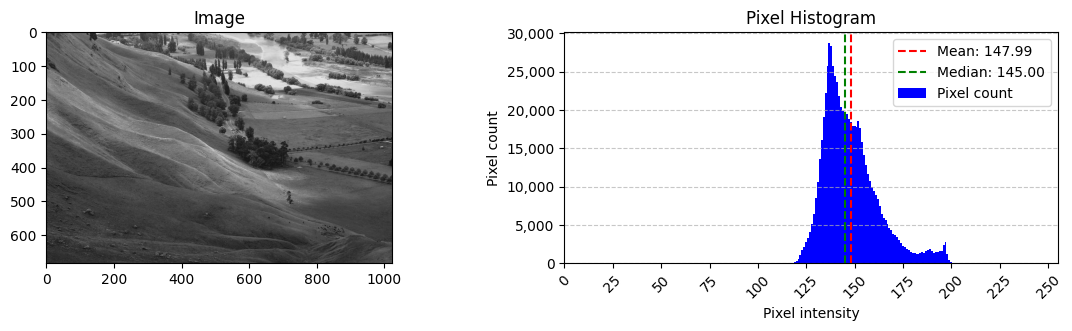

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

img = cv2.imread("histogram_example.jpg", cv2.IMREAD_GRAYSCALE)

# 히스토그램 계산
# cv2.calcHist(images, channels, mask, histSize, ranges)
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

# 평균(mean)과 중앙값(median) 계산
mean_val = np.mean(img)
median_val = np.median(img)

rows, cols = 1, 2
chart_idx = 0
plt.figure(figsize=(cols*7, rows*3))

plt.subplot(rows, cols, chart_idx := chart_idx + 1 )
plt.title( 'Image' )
plt.imshow( img, cmap="gray" )
plt.axis( "on" )

# 히스토그램 데이터를 Bar Chart로 그리기 
plt.subplot(rows, cols, chart_idx := chart_idx + 1 )
plt.title('Pixel Histogram')
# 히스토그램 Bar Chart 출력
plt.bar(range(256), histogram.ravel(), width=1, color='blue', label="Pixel count" )
# 평균과 중앙값 표시
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')

plt.xlabel('Pixel intensity')
plt.ylabel('Pixel count')
plt.xlim([0, 255])  # x축 범위를 0부터 255로 설정
# x축 tick을 적당한 간격으로 설정 (예: 0, 25, 50, ..., 255)
tick_values = np.arange(0, 256, 25)
tick_texts = [ f"{tick}" for tick in tick_values ]
plt.xticks(tick_values, tick_texts, rotation=45)  # 각 tick에 레이블 추가

# y축 tick 포매팅
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter( lambda value, _ : f'{int(value):,}' ))

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.show()